In [168]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../my_libs')
import my_libs.plot_format as pf
from matplotlib.patches import Rectangle

eps0 = 8.85e-12     # F/m

kb = 1.38e-23       #J/K
h = 6.62607015e-34  # Planck constant in Js
q = 1.602e-19 #C
sq2 = np.sqrt(2)
m = 2.657e-26  # Mass of oxygen molecule in kg

temp = 300. #K
press = 1e5 #Pa


def debye(nh, eps):
    return np.sqrt(eps*kb*temp/(nh*q**2))
    
def depletion_SCR(nh, sigma0, eps):
    lD = debye(nh, eps)
    S0 = sigma0/(q*nh*lD*2*np.sqrt(2))
    E0 = 2*np.log(S0 + np.sqrt(S0**2 + 1))
    V0 = E0 * kb*temp/q
    Delta = E0/(S0*np.sqrt(2))
    D = Delta * lD
    rho0 = sigma0/Delta/lD
    return V0, D, E0, S0, lD, rho0

def delta0(sigma0, eps):
    lD = debye(nh, eps)
    S0 = sigma0/(q*nh*lD*2*np.sqrt(2))
    E0 = 2*np.log(S0 + np.sqrt(S0**2 + 1))
    return -1/sq2*np.log(np.tanh(E0/4))


def potential_profile(x, nh, sigma0, eps):
    lD = debye(nh, eps)
    d0 = delta0(sigma0, eps)
    d = x/lD + d0
    V = kb*temp/q * 2 * np.log(np.tanh(d/sq2))
    return V

def rho_profile(x, nh, sigma0, eps):
    lD = debye(nh, eps)
    d0 = delta0(sigma0, eps)
    d = x/lD + d0
    rho = 2 * q * nh * np.cosh(sq2*d)/np.sinh(sq2*d)**2
    return rho

def sigma(ns, theta):
    return q*theta*ns



Maximum theoretical spots for oxygen, not even adsorption sites: n_s=1.19e+19 m-2
For p = 1e+05 Pa, T= 500 K, E_b = 0.27 eV is θ = 5.7e-05


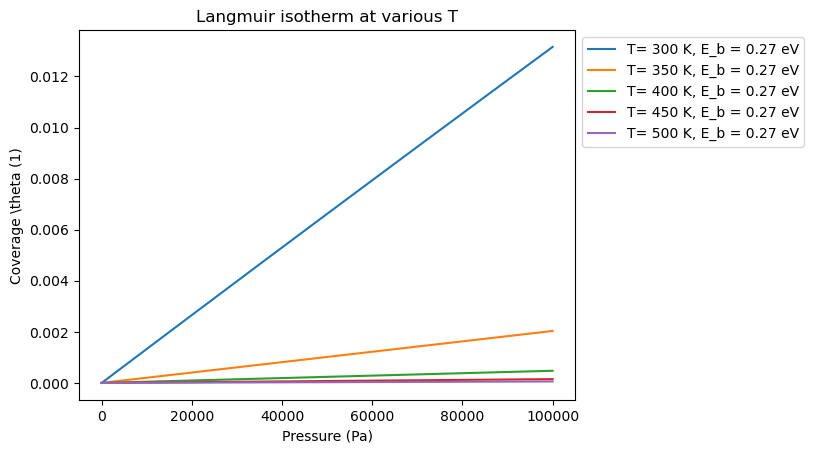

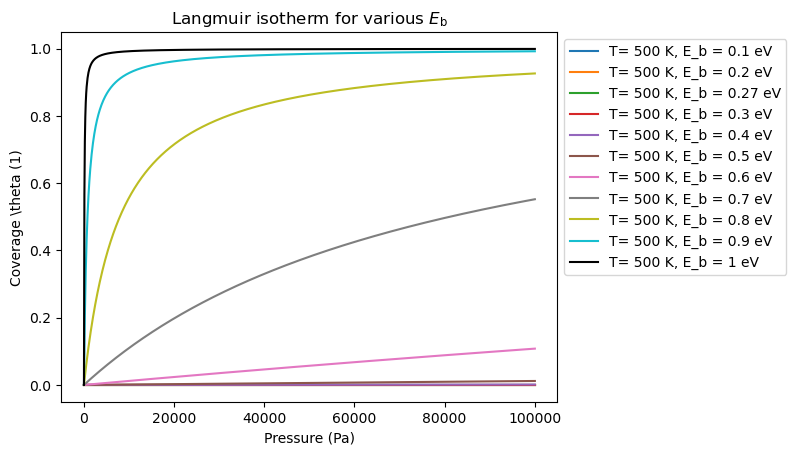

In [97]:
nh = 1e16 * 1e6   # m^-3
theta = 0.3   # surface coverage
ns = 1e17   # m^-2

sigma0 = sigma(ns, theta)

#estimation of number of adsorption sites
#CuO unit cell 2.9
a = 2.9 #\oA
ns = 1/(a*1e-10)**2

print(f'Maximum theoretical spots for oxygen, not even adsorption sites: n_s={ns:.3g} m-2')

def theta(E_b, T, p):
    # p_0(T) calculation
    p0_T = (((2 * np.pi * m * kb * T) / h**2) ** (3 / 2)) * np.exp(-E_b / (kb * T)) * kb * T
        
    # Theta calculation
    theta = p / (p + p0_T)

    return theta

E_b = 0.27 # eV \ref{Hu2010}

print(f'For p = {press:.3g} Pa, T= {temp:.3g} K, E_b = {E_b:.2g} eV is θ = {theta(E_b*q, temp, press):.2g}')

p_plot = np.linspace(0, 1e5, 1000)
E_b_plot = np.linspace(0.1, 1, 10)
E_b_plot = np.append(E_b_plot, 0.27)  # Add the value 0.27
E_b_plot = np.sort(E_b_plot)
T_plot = np.linspace(300, 500, 5)

#for E_b in E_b_plot:
for temp in T_plot:
    theta_plot = theta(E_b*q, temp, p_plot)
    plt.plot(p_plot, theta_plot, label=f'T= {temp:.3g} K, E_b = {E_b:.2g} eV')

plt.title(r'Langmuir isotherm at various T')
plt.xlabel('Pressure (Pa)')
plt.ylabel(r'Coverage \theta (1)')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
#plt.tight_layout()
plt.show()

temp = 500
traces = []

for E_b in E_b_plot:
    theta_plot = theta(E_b*q, temp, p_plot)
    trace, = plt.plot(p_plot, theta_plot, label=f'T= {temp:.3g} K, E_b = {E_b:.2g} eV')
    traces.append(trace)
    
traces[10].set_color('black')    

plt.title(r'Langmuir isotherm for various $E\mathrm{_b}$')
plt.xlabel('Pressure (Pa)')
plt.ylabel(r'Coverage \theta (1)')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
#plt.tight_layout()
plt.show()






For θ = 0.01, n_s = 1e+19 and n_h = 1e+22: l_D = 59.7 nm, V_0 = 0.247 V, E_SCR = 6.82 nm
For θ = 0.05, n_s = 1e+19 and n_h = 1e+22: l_D = 59.7 nm, V_0 = 0.33 V, E_SCR = 1.82 nm
For θ = 1.00, n_s = 1e+19 and n_h = 1e+22: l_D = 59.7 nm, V_0 = 0.485 V, E_SCR = 0.134 nm
For θ = 0.01, n_s = 1e+19 and n_h = 1e+22: l_D = 119 nm, V_0 = 0.211 V, E_SCR = 23.3 nm
For θ = 0.05, n_s = 1e+19 and n_h = 1e+22: l_D = 119 nm, V_0 = 0.294 V, E_SCR = 6.5 nm
For θ = 1.00, n_s = 1e+19 and n_h = 1e+22: l_D = 119 nm, V_0 = 0.449 V, E_SCR = 0.496 nm
For θ = 0.01, n_s = 1e+19 and n_h = 1e+22: l_D = 378 nm, V_0 = 0.152 V, E_SCR = 167 nm
For θ = 0.05, n_s = 1e+19 and n_h = 1e+22: l_D = 378 nm, V_0 = 0.235 V, E_SCR = 51.8 nm
For θ = 1.00, n_s = 1e+19 and n_h = 1e+22: l_D = 378 nm, V_0 = 0.389 V, E_SCR = 4.3 nm
For θ = 0.01, n_s = 1e+19 and n_h = 1e+22: l_D = 534 nm, V_0 = 0.134 V, E_SCR = 296 nm
For θ = 0.05, n_s = 1e+19 and n_h = 1e+22: l_D = 534 nm, V_0 = 0.217 V, E_SCR = 95.8 nm
For θ = 1.00, n_s = 1e+19 and n_

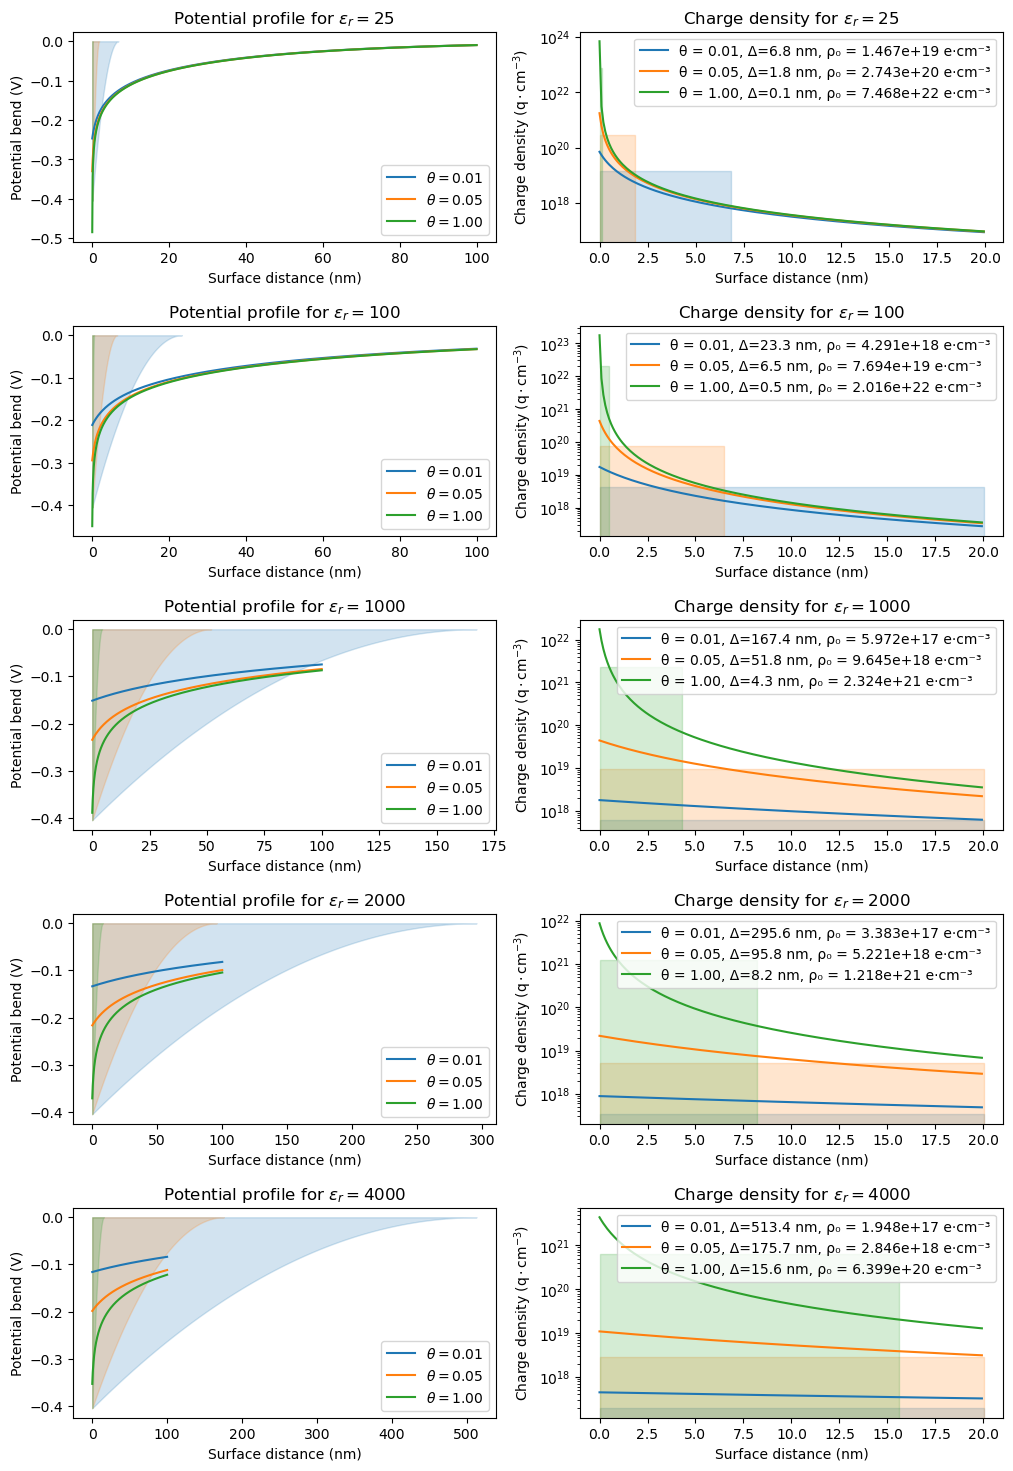

In [198]:
x = np.linspace(0, 100, 1000)

#x_log = np.logspace(np.log10(0.001), np.log10(20), 999)
#x = np.hstack((0, x_log))  # Add 0 as the first point

red_rho = 5 #how is rho x-axis shorter

ns = 1e19
theta_values = [0.01,0.05,1]

eps_r_values = [25,100,1000,2000,4000]
SCRs = []

fig, sub = plt.subplots(len(eps_r_values), 2, figsize=(12, 18))

for j, eps_r in enumerate(eps_r_values):
    eps = eps0 * eps_r

    for theta in theta_values:
        #plot potential
        V = potential_profile(x * 1e-9, nh, sigma(ns, theta), eps)
        trace, = sub[j,0].plot(x, V, label=r'$θ = $'+f'{theta:.2f}')
        V0, D, E0, S, lD, rho0 = depletion_SCR(nh, sigma(ns, theta), eps)
        E_SCR = D*1e9
        print(f"For θ = {theta:.2f}, n_s = {ns:.0e} and n_h = {nh:.2g}: l_D = {lD*1e9:.3g} nm, V_0 = {V0:.3g} V, E_SCR = {E_SCR:.3g} nm")
    
        # Plot the parabola potential (SCR)
        fill_x = np.linspace(0, E_SCR, 100)        
        c = y_min
        a = c/(E_SCR**2)
        b = -2*a*E_SCR        
        fill_y = a * fill_x**2 + b * fill_x + c
        
        sub[j,0].plot(fill_x, fill_y, color='none', alpha=0)
        sub[j,0].fill_between(fill_x, fill_y, color=trace.get_color(), alpha=0.2)  
             
        sub[j,0].set_title(r'Potential profile for $\epsilon_r = $'+f'{eps_r}')
        sub[j,0].set_xlabel('Surface distance (nm)')
        sub[j,0].set_ylabel('Potential bend (V)')
        sub[j,0].legend()
        
        
        #plot charge density
        rho = rho_profile(x[:x.size//red_rho]*1e-9, nh, sigma(ns, theta), eps)         
        trace, = sub[j,1].semilogy(x[:x.size//red_rho], rho / q * 1e-6, label=f'θ = {theta:.2f}, Δ={E_SCR:.1f} nm, ρ₀ = {rho0/q*1e-6:.3e} e·cm⁻³')
        sub[j,1].set_title(r'Charge density for $\epsilon_r = $'+f'{eps_r}')
        sub[j,1].set_xlabel('Surface distance (nm)')
        sub[j,1].set_ylabel('Charge density ('+pf.tex_unit("q*cm-3")+')')
        sub[j,1].legend()   
        scr_x=[0, min(E_SCR, x[x.size//red_rho])]
        scr_y=[rho0/q*1e-6,rho0/q*1e-6]
        sub[j,1].plot(scr_x, scr_y, color='none', alpha=0)
        sub[j,1].fill_between(scr_x, scr_y, color=trace.get_color(), alpha=0.2)  

plt.subplots_adjust(hspace=0.4)
plt.savefig('NPs/potential_bending.png')
plt.show()
    

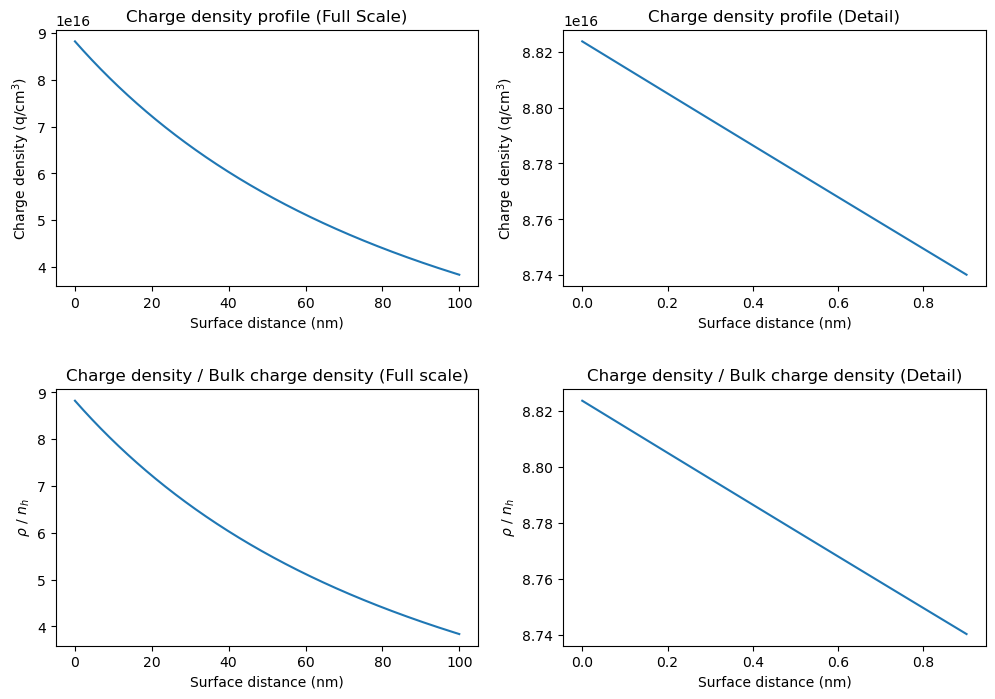

In [186]:
mag = 0.01 #magnification of second plot

rho = rho_profile(x*1e-9, nh, sigma0, eps)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# First plot with the full x-range
axs[0,0].plot(x, rho / q * 1e-6)
axs[0,0].set_title('Charge density profile (Full Scale)')
axs[0,0].set_xlabel('Surface distance (nm)')
axs[0,0].set_ylabel('Charge density (q/cm$^3$)')

# Second plot with limited x-range
index_mag = np.argmax(x > mag * x[-1])
x_mag = x[:index_mag]
rho_mag = rho[:index_mag]
axs[0,1].plot(x_mag, rho_mag / q * 1e-6)
axs[0,1].set_title('Charge density profile (Detail)')
axs[0,1].set_xlabel('Surface distance (nm)')
axs[0,1].set_ylabel('Charge density (q/cm$^3$)')

axs[1,0].plot(x, rho/q/nh)
axs[1,0].set_title('Charge density / Bulk charge density (Full scale)')
axs[1,0].set_xlabel('Surface distance (nm)')
axs[1,0].set_ylabel(r'$\rho$ / $n_h$')

axs[1,1].plot(x_mag, rho_mag/q/nh)
axs[1,1].set_title('Charge density / Bulk charge density (Detail)')
axs[1,1].set_xlabel('Surface distance (nm)')
axs[1,1].set_ylabel(r'$\rho$ / $n_h$')

plt.subplots_adjust(hspace=0.4)
plt.show()
